1. Pick two columns from Iris data set such as “sepal_length” and “sepal_width”.
Compute the Covariance and Correlation Matrix for the extracted two dimensional
dataset.

In [4]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
sepal_length = data[:, 0]
sepal_width = data[:, 1]
cov = np.cov(sepal_length, sepal_width)
corr = np.corrcoef(sepal_length, sepal_width)

print("Covariance Matrix:")
print(cov)
print("\nCorrelation Matrix:")
print(corr)


Covariance Matrix:
[[ 0.68569351 -0.042434  ]
 [-0.042434    0.18997942]]

Correlation Matrix:
[[ 1.         -0.11756978]
 [-0.11756978  1.        ]]


2. Implement Linear Discriminant Analysis Algorithm and use it to reduce dimensions
of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
domain with different colour codes for samples belonging to different classes.

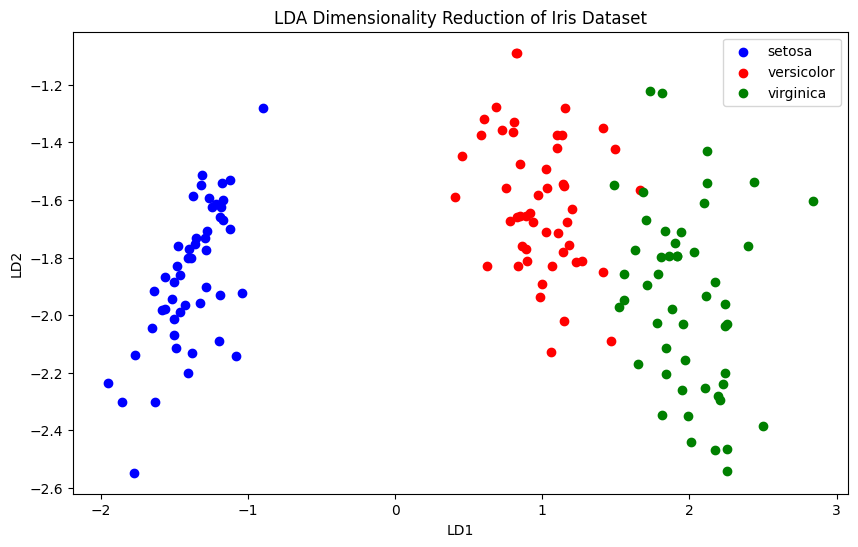

In [5]:
import matplotlib.pyplot as plt

def lda(X, y, n_components=2):
    class_means = []
    for c in np.unique(y):
        class_means.append(np.mean(X[y == c], axis=0))

    S_W = np.zeros((X.shape[1], X.shape[1]))
    for c, m in zip(np.unique(y), class_means):
        S_W += np.dot((X[y == c] - m).T, (X[y == c] - m))

    overall_mean = np.mean(X, axis=0)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    for c, m in zip(np.unique(y), class_means):
        n = X[y == c].shape[0]
        m = m.reshape(-1, 1)
        overall_mean = overall_mean.reshape(-1, 1)
        S_B += n * np.dot((m - overall_mean), (m - overall_mean).T)

    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    top_eigen_indices = np.argsort(eigenvalues)[::-1][:n_components]
    W = eigenvectors[:, top_eigen_indices]

    return W

iris = load_iris()
data = iris.data
target = iris.target

X_lda = data.dot(lda(data, target))
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']
for i, c in enumerate(np.unique(target)):
    plt.scatter(X_lda[target == c, 0], X_lda[target == c, 1], c=colors[i], label=iris.target_names[c])
plt.title('LDA Dimensionality Reduction of Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()